In [ ]:
#Python module import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)

In [ ]:
#Load data
!wget https://raw.githubusercontent.com/bengranat/ITP487FINAL/main/Student_SurveyFINAL.csv
survey_data = pd.read_csv('Student_SurveyFINAL.csv')
#Renames columns
survey_data.rename(columns={"16Personalities Quiz.  You will need to first take the quiz located at https://www.16personalities.com/. This quiz will take about 10 miinutes. Select your personality letters below. E.g. ENTJ-A, INTP-A, etc.":'Personality_Type'}, inplace=True)
print(survey_data.columns)

--2022-12-04 22:52:46--  https://raw.githubusercontent.com/bengranat/ITP487FINAL/main/Student_SurveyFINAL.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31279 (31K) [text/plain]
Saving to: ‘Student_SurveyFINAL.csv’

Student_SurveyFINAL 100%[===================>]  30.55K  --.-KB/s    in 0.003s  

2022-12-04 22:52:46 (10.1 MB/s) - ‘Student_SurveyFINAL.csv’ saved [31279/31279]

Index(['Personality_Type', 'Major_1', 'Major_2', 'Minor_1', 'Minor_2',
       'PDP_Status', 'Grad_Year', 'Class_Standing', 'GPA', 'Semester_Units',
       'Transfer', 'International_Student', 'Post_Grad_Plan', 'Industry',
       'Planned_Role', 'Num_Football_Games', 'Social_Greek_Life_Status',
       'Prof_Greek_Life_Status', 'Prof_Org_Status', 'Cultural_Org_Status',
       'Religio

In [ ]:
#Clean data
survey_data.dropna('columns')
#Dropping duplicates
survey_data.drop_duplicates()
#Correcting data types
survey_data['Sex'] = survey_data['Sex'].astype('string')
survey_data['Overall_USC_Exp'] = survey_data['Overall_USC_Exp'].astype('int')
survey_data['USC_Social_Exp'] = survey_data['USC_Social_Exp'].astype('int')
#Isolating variables of interest
surveydata_update = survey_data[['Personality_Type', 'Grad_Year', 'GPA', 'Sex', 'Overall_USC_Exp', 'Merit_Scholarship_Percent', 'Age', 'USC_Social_Exp']]
print(surveydata_update)

   Personality_Type  Grad_Year   GPA                Sex  Overall_USC_Exp  \
0            ISFJ-A       2024  3.98             Female                4   
1            ISFJ-A       2024  3.98             Female                4   
2            INFJ-A       2023  3.97               Male                4   
3            ESFP-A       2023  3.70               Male                3   
4            ENFP-T       2023  3.66             Female                5   
5            ENTP-A       2023  3.91               Male                4   
6            ESTJ-A       2023  3.30               Male                3   
7            INFJ-A       2023  3.68             Female                5   
8            INFJ-A       2023  3.78             Female                4   
9            ENFP-T       2023  3.67             Female                4   
10           ISFJ-T       2023  3.94  Prefer not to say                4   
11           ESFJ-A       2023  3.84             Female                5   
12          

<ipython-input-3-ac34ecc91c7b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  survey_data.dropna('columns')


In [ ]:
#Clean data
#Creating new column stating let
pers_type = []
for i in surveydata_update['Personality_Type']:
  if i[2] == 'F':
    pers_type.append('F')
  elif i[2] == 'T':
    pers_type.append('T')
surveydata_update['F/T'] = pers_type
print(surveydata_update)

   Personality_Type  Grad_Year   GPA                Sex  Overall_USC_Exp  \
0            ISFJ-A       2024  3.98             Female                4   
1            ISFJ-A       2024  3.98             Female                4   
2            INFJ-A       2023  3.97               Male                4   
3            ESFP-A       2023  3.70               Male                3   
4            ENFP-T       2023  3.66             Female                5   
5            ENTP-A       2023  3.91               Male                4   
6            ESTJ-A       2023  3.30               Male                3   
7            INFJ-A       2023  3.68             Female                5   
8            INFJ-A       2023  3.78             Female                4   
9            ENFP-T       2023  3.67             Female                4   
10           ISFJ-T       2023  3.94  Prefer not to say                4   
11           ESFJ-A       2023  3.84             Female                5   
12          

<ipython-input-4-cbdfa740a282>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surveydata_update['F/T'] = pers_type


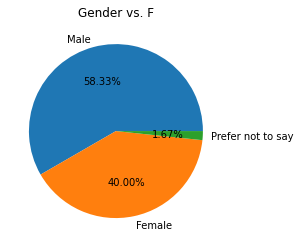

In [ ]:
#Pie Chart Creation
F_data = surveydata_update.loc[surveydata_update['F/T'] == 'F', :]
T_data = surveydata_update.loc[surveydata_update['F/T'] == 'T', :]


figure, axis = plt.subplots(1, 1)

axis.pie([len(F_data.loc[F_data['Sex'] == 'Male', :]), 
             len(F_data.loc[F_data['Sex'] == 'Female', :]), 
             len(F_data.loc[F_data['Sex'] == 'Prefer not to say', :])], 
             labels=['Male', 'Female', 'Prefer not to say'], autopct='%1.2f%%')
axis.set_title('Gender vs. F')
 
 
plt.show()

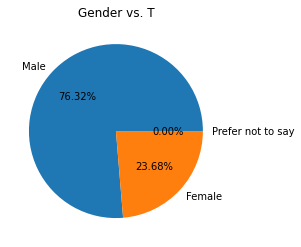

In [ ]:
#Second Pie Chart Creation

figure, axis = plt.subplots(1, 1)

axis.pie([len(T_data.loc[T_data['Sex'] == 'Male', :]), 
             len(T_data.loc[T_data['Sex'] == 'Female', :]), 
             len(T_data.loc[T_data['Sex'] == 'Prefer not to say', :])], 
             labels=['Male', 'Female', 'Prefer not to say'], autopct='%1.2f%%')
axis.set_title('Gender vs. T')


plt.show()

Text(0.5, 1.0, 'USC Social Expirience vs. Personality Type')

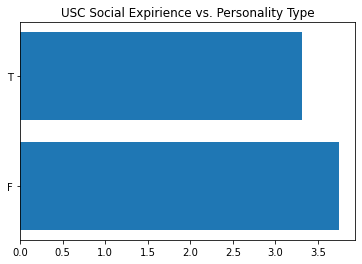

In [ ]:
#Bar Chart
plt.barh(['F', 'T'], [np.average(F_data['USC_Social_Exp']), np.average(T_data['USC_Social_Exp'])])
plt.title('USC Social Expirience vs. Personality Type')

In [ ]:
#Pearson Correlation
correlation_study = surveydata_update[['Overall_USC_Exp', 'Age']]
print(correlation_study.corr(method = 'pearson'))

                 Overall_USC_Exp       Age
Overall_USC_Exp         1.000000  0.093122
Age                     0.093122  1.000000


In [ ]:
#Data Mart
data_mart = surveydata_update.loc[(surveydata_update['Grad_Year'] == 2022) & (surveydata_update['GPA'] > 3.3) & (surveydata_update['GPA'] < 3.6)]
data_mart_schol = []
for i in surveydata_update['Merit_Scholarship_Percent']:
  data_mart_schol.append(int(i[:-1]))

bool_list = []
for i in data_mart_schol:
  if i >= 50:
    bool_list.append(True)
  else:
    bool_list.append(False)

data_mart_final = surveydata_update.loc[bool_list]

print(data_mart)
print(data_mart_final)



   Personality_Type  Grad_Year   GPA     Sex  Overall_USC_Exp  \
50           INTP-T       2022  3.50  Female                4   
58           INFJ-A       2022  3.41    Male                4   
76           ENTJ-T       2022  3.50    Male                4   
95           ENFP-A       2022  3.31    Male                4   

   Merit_Scholarship_Percent  Age  USC_Social_Exp F/T  
50                      100%   23               4   T  
58                        0%   23               3   F  
76                        0%   22               2   T  
95                       50%   22               4   F  
   Personality_Type  Grad_Year   GPA     Sex  Overall_USC_Exp  \
11           ESFJ-A       2023  3.84  Female                5   
12           ENFP-T       2022  3.70    Male                5   
17           ENTJ-A       2024  3.83    Male                2   
18           ISFJ-A       2024  3.80  Female                4   
20           INTJ-T       2023  3.72  Female                3   
24  